# 회귀 모델
- 실제 키-몸무게 데이터를 사용하여 회귀 예측 모델을 만들어 본다
- 남여 성별 정보를 사용하여 성능의 개선되는 것을 확인한다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터 다운로드
- 남여 키, 몸무게 데이터

In [2]:
data = pd.read_csv("https://github.com/data-labs/data/raw/main/weight-height.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [3]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [4]:
print(data.shape)
data[:5]

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
data.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [6]:
# 단위 변환 (인치, 파운드 --> cm, kg)
data.Height = data.Height*2.54 # cm
data.Weight = data.Weight*0.453592 # kg
data[:5]

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499761,93.598619


In [7]:
# 사본 사용 (원본 백업)
df = data.copy()
df[:3]

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550


## 데이터 특성

In [8]:
x = df.Height.values
y = df.Weight.values

In [9]:
len(x), len(y)

(10000, 10000)

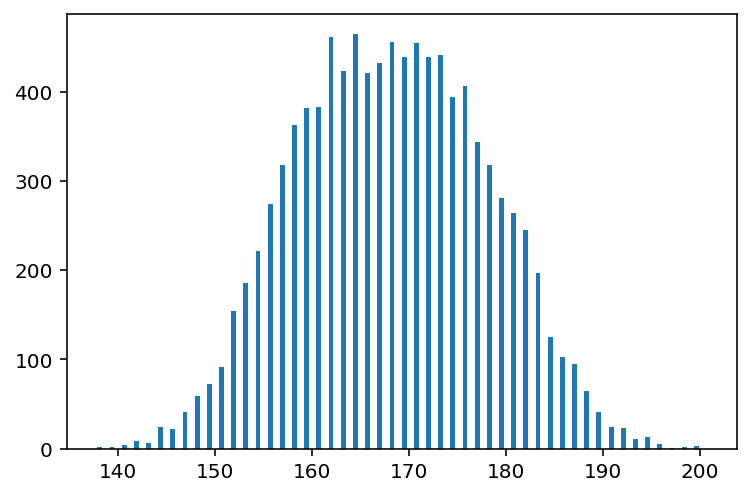

In [10]:
plt.hist(x, bins=50, width=0.5)
plt.show()

In [11]:
x.max()

200.65680555982956

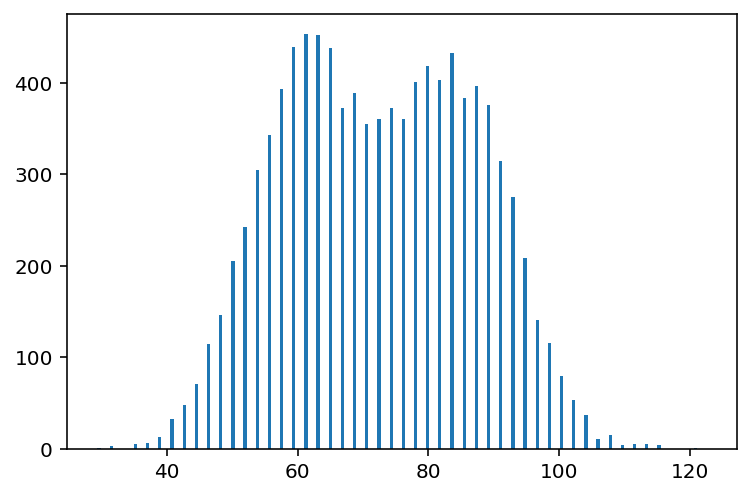

In [12]:
plt.hist(y, bins=50, width=0.5)
plt.show()

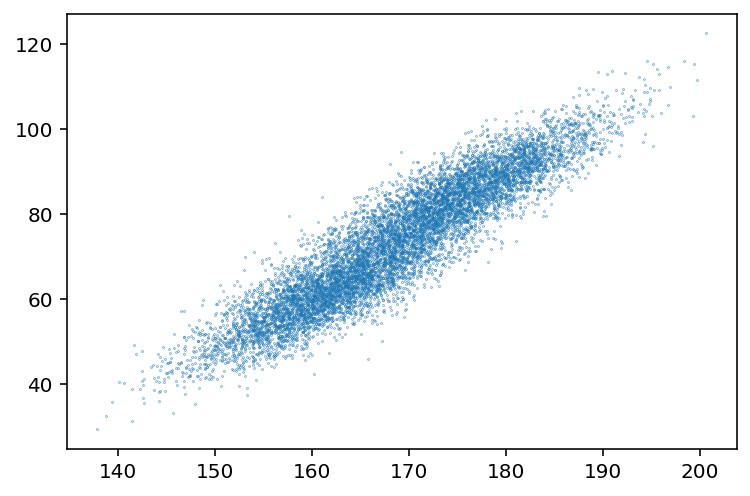

In [13]:
plt.scatter(x,y, s=0.05)

# 키로부터 몸무게 예측
- 성별 정보는 사용하지 않음. 즉, 남여를 구분하지 않는다

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [15]:
# 학습 및 검증 데이터 크기 확인
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((7500,), (2500,), (7500,), (2500,))

In [16]:
# 모델 생성, 학습, 사용 후 성능 보기 (R-Squared)
from sklearn.linear_model import LinearRegression
model = LinearRegression() # (1) 모델 생성
model.fit(x_train.reshape(-1,1), y_train) # (2) 학습
model.score(x_test.reshape(-1,1), y_test) # (3) 이용, 성능평가

0.8630778884454313

In [17]:
# 학습한 계수(파라미터)
a, b = model.coef_, model.intercept_
a, b

(array([1.38010403]), -159.42976818968918)

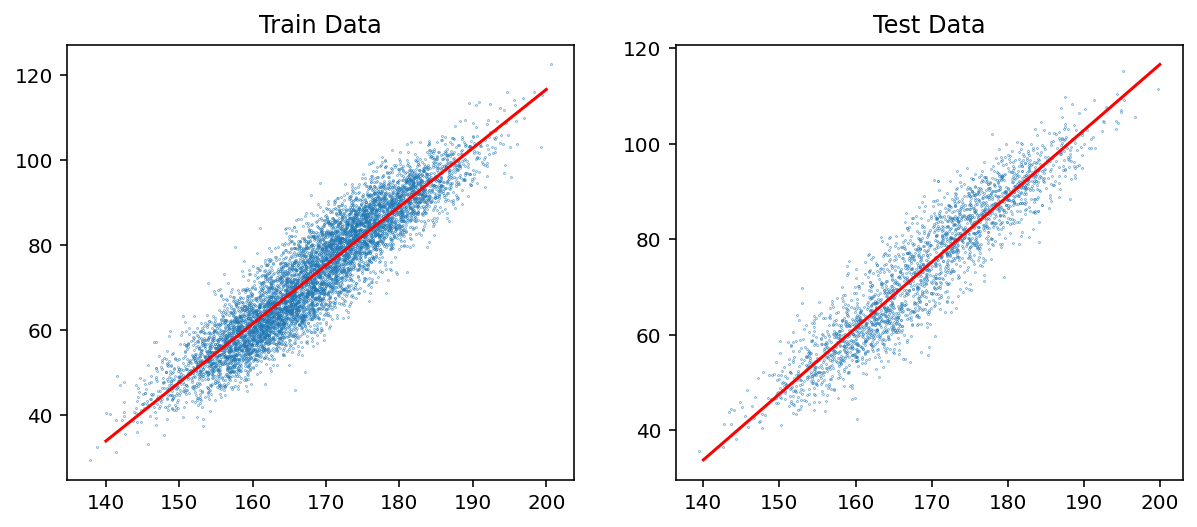

In [18]:
# 훈련과 검증 데이터에 대한 회귀 직선 보기
plt.figure(figsize=(10,4))
xs = np.linspace(140,200,2)
ys = a*xs + b

plt.subplot(1,2,1)  
plt.title('Train Data')
plt.plot(xs,ys, c='r')
plt.scatter(x_train,y_train, s=0.05)

plt.subplot(1,2,2)  
plt.title('Test Data')
plt.plot(xs,ys, c='r')
plt.scatter(x_test,y_test, s=0.05)

## 남여 구분 정보 사용
- 추가정보를 사용함으로써 (즉, 입력 데이터의 컬럼 수를 늘임으로써) 성능이 개선되는지 확인

In [19]:
df[:3]

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550


In [20]:
# Gender 컬럼의 값 확인
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [21]:
sex = df.Gender.map({'Male':0, 'Female':1})
# 다른 방법 sex = df.Gender.apply(lambda x: 0 if x=="Male" else 1)
df.Gender = sex
df[:3]

,Gender,Height,Weight
0,0,187.571423,109.720985
1,0,174.706036,73.622732
2,0,188.239668,96.497550


In [22]:
sex

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: Gender, Length: 10000, dtype: int64

## 키만 사용한 경우 (복습)
- 몸무게를 예측하는데 키만 사용하고 성별 정보는 사용하지 않는 경우
- 성능 평가는 R-Squared 값 보기

In [23]:
x = df.Height.values
y = df.Weight.values

x_train, x_test, y_train, y_test = train_test_split(x, y)
model = LinearRegression() # (1) 모델 생성
model.fit(x_train.reshape(-1,1), y_train)
model.score(x_test.reshape(-1,1), y_test)

0.8515419416991529

# 성별과 키, 두개의 컬럼을 사용
- 남여의 키-몸무게 관계가 다르므로 추가 정보 사용으로 성능이 개선될 것으로 예상
- 2차원 배열 구조를 가지므로 소문자 x 대시 대문자 X를 사용한다
 - 2차원 배열을 사용하므로 reshape(-1,1)이 필요 없다

In [24]:
X = df[["Gender", "Height"]]
y = df.Weight.values

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression() 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9019763529678817

In [25]:
X[:3]

,Gender,Height
0,0,187.571423
1,0,174.706036
2,0,188.239668


- 성별 정보를 추가로 사용하여 성능이 개선되었다

## 다중 회귀 모델
- 입력 변수가 2개인 다중회귀 모델이므로 파라미터가 변수의 수만큼 자동으로 2개 만들어진다
- $\hat{y} = b +a_{1}x_{1} + a_{2}x_{2}$
- $x_{1}$: 성별, $x_{2}$: 키

In [26]:
print(model.coef_)
print(model.intercept_)

[-8.72534798  1.07375163]
-103.44989219276134


In [27]:
a1, a2 = model.coef_[0], model.coef_[1]
b1 = model.intercept_

## 회귀직선
- (1)남성의 경우 회귀 직선 (Gender=0, 갈색 점): 파란색 선
- (2)여성의 경우 회귀 직선 (Gender=1, 노란색 점): 붉은색 선
- (3)성별을 구분하지 않는 전체 대상의 회귀직선: 검정색

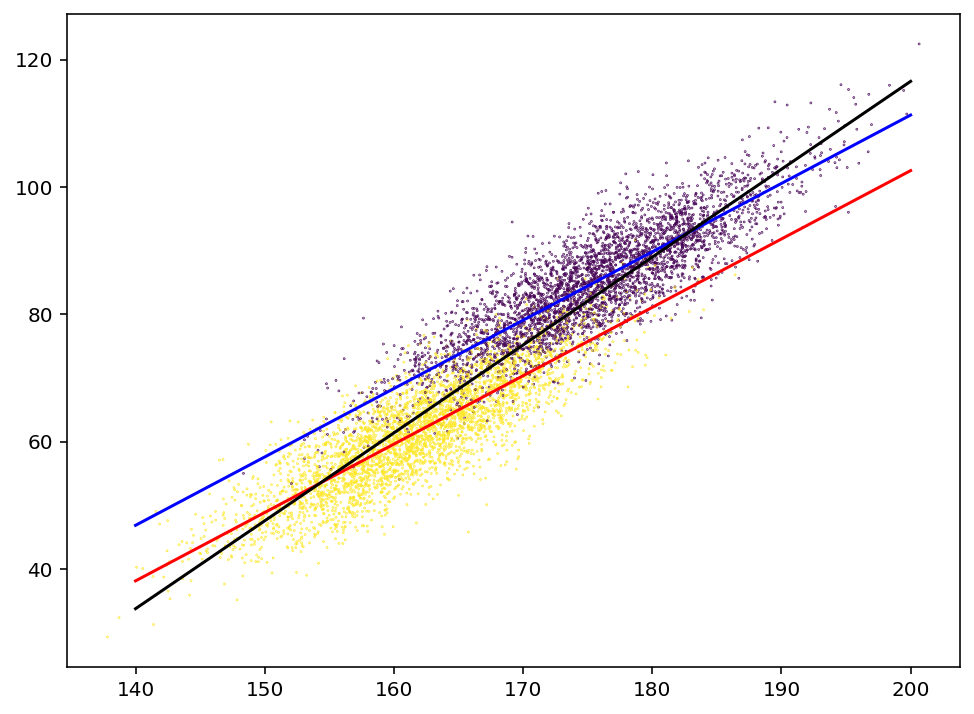

In [28]:
xs = np.linspace(140,200,2)
plt.figure(figsize=(8,6))
plt.scatter(X_train.Height, y_train, c=X_train.Gender, s=0.1)

# 남성의 경우 회귀 직선 (Gender=0)
ys = a1*0 + a2*xs + b1
plt.plot(xs, ys, c='b')

# 여성의 경우 회귀 직선 (Gender=1)
ys = a1*1 + a2*xs + b1
plt.plot(xs, ys, c='r')

# 남여 구분 없는 경우 회귀 직선 (a, b 파라미터 사용)
ys = a*xs + b
plt.plot(xs, ys, c='k')

- 다른 카테고리 변수 추가

In [29]:
df[:3]

,Gender,Height,Weight
0,0,187.571423,109.720985
1,0,174.706036,73.622732
2,0,188.239668,96.497550


In [30]:
df["Nation"] = np.random.choice(["China","Korea","Japan"], 10000)
df[:10]

,Gender,Height,Weight,Nation
0,0,187.571423,109.720985,Japan
1,0,174.706036,73.622732,Japan
2,0,188.239668,96.497550,Japan
3,0,182.196685,99.809504,China
4,0,177.499761,93.598619,Japan
5,0,170.822660,69.042216,Japan
6,0,174.714106,83.428219,Korea
7,0,173.605229,76.190352,China
8,0,170.228132,79.800187,China
9,0,161.179495,70.941642,Japan


In [31]:
df.Nation.value_counts()

China    3397
Japan    3325
Korea    3278
Name: Nation, dtype: int64

In [32]:
df_nat = pd.get_dummies(df["Nation"])
df_nat[:3]

,China,Japan,Korea
0,0,1,0
1,0,1,0
2,0,1,0


In [34]:
df = df.join(df_nat)
df[:3]

,Gender,Height,Weight,Nation,China,Japan,Korea
0,0,187.571423,109.720985,Japan,0,1,0
1,0,174.706036,73.622732,Japan,0,1,0
2,0,188.239668,96.497550,Japan,0,1,0


In [35]:
data[:3]

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550


In [36]:
pd.get_dummies(data.Gender)

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9995,1,0
9996,1,0
9997,1,0
9998,1,0


## 기타 성능 평가
- MAE, RMSE 값은 각각 mean_absolute_error, mean_squared_error 함수가 제공한다

In [37]:
y_pred = model.predict(X_test)

In [38]:
# MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, y_pred)

3.587688907791306

In [39]:
# RMSE 를 얻으려면 squared=False 를 설정한다
mean_squared_error(y_test, y_pred, squared=False)

4.511869449675487

In [40]:
error = np.abs(y_pred-y_test)
error.max()

17.45602051877667

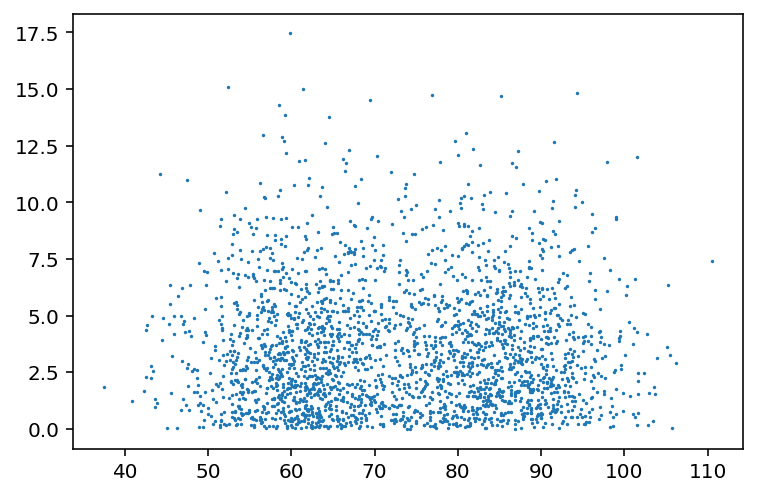

In [41]:
plt.scatter(y_pred, error, s=0.5)